In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("../input/all-dpw-wo-20182000/All-DPW-WO_2018-2000.csv")
df.head()

,Export Date,Id,Status,Priority,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Modified Date,Last Modified By,Time Open,Description,Comments,Finalized Date,QAlert Id (Do not edit)
0,3/4/2021 18:50,12495708,Complete,5,321,Charger Ave,ALL-Street Cleaning,6/29/2020 10:41:49 AM,kimberly.wells@umb.edu,7/3/2020 4:31:51 PM,bguinasso@revere.org,4 days 5 hrs 50 mins,All hands on deck Citywide street cleaning,NaN,7/3/2020 4:31:51 PM,NaN
1,3/4/2021 18:50,12510009,Complete,5,321,Charger Ave,ALL-Street Cleaning,7/1/2020 5:00:00 AM,kimberly.wells@umb.edu,7/3/2020 4:31:55 PM,bguinasso@revere.org,2 days 11 hrs 31 mins,All hands on deck Citywide street cleaning,NaN,7/3/2020 4:31:55 PM,NaN
2,3/4/2021 18:50,12632922,Complete,5,321,Charger Ave,ALL-Street Cleaning,7/22/2020 5:00:00 AM,kimberly.wells@umb.edu,7/24/2020 12:10:42 PM,pargenzio@revere.org,2 days 7 hrs 10 mins,All hands on deck Citywide street cleaning,NaN,7/24/2020 12:10:42 PM,NaN
3,3/4/2021 18:50,12785149,Complete,5,321,Charger Ave,ALL-Street Cleaning,8/12/2020 5:00:00 AM,kimberly.wells@umb.edu,8/12/2020 12:32:33 PM,pargenzio@revere.org,0 days 7 hrs 32 mins,All hands on deck Citywide street cleaning,NaN,8/12/2020 12:32:33 PM,NaN
4,3/4/2021 18:50,12909944,Complete,5,321,Charger Ave,ALL-Street Cleaning,9/2/2020 5:00:00 AM,kimberly.wells@umb.edu,11/6/2020 2:15:29 PM,bguinasso@revere.org,65 days 9 hrs 15 mins,All hands on deck Citywide street cleaning,NaN,11/6/2020 2:15:29 PM,NaN


In [13]:
print(df.columns)

Index(['Export Date', 'Id', 'Status', 'Priority', 'Address Number',
       'Street Name', 'Work Type', 'Date Flagged', 'Flagged By',
       'Modified Date', 'Last Modified By', 'Time Open', 'Description',
       'Comments', 'Finalized Date', 'QAlert Id (Do not edit)'],
      dtype='object')


In [14]:
df.isnull().sum()

Export Date                    0
Id                             0
Status                         0
Priority                       0
Address Number              2991
Street Name                   77
Work Type                      0
Date Flagged                   0
Flagged By                     0
Modified Date                  0
Last Modified By               0
Time Open                      0
Description                 8445
Comments                   48438
Finalized Date               238
QAlert Id (Do not edit)    60931
dtype: int64

In [15]:
# Now to drop the null streets because they are useless
# Also lets just drop any ones with a null finalized date bc there are so little
df.dropna(subset=['Address Number', 'Street Name', 'Finalized Date'], inplace=True)
# Lets also just fill null comments with empty strings
df["Description"].fillna("", inplace = True)
df["Comments"].fillna("", inplace = True)

In [ ]:
df.isnull().sum()

Yay! No more null streets! ... we also need to remove street numbers that are '0'

In [ ]:
df.dtypes

... but we first need to convert our columns to the appropriate types

In [ ]:
import re as re
# remove any characters that appear in the address number (this could be because of apartements)
df['Address Number Filtered'] = pd.to_numeric(df.apply(lambda x: re.sub("[^0-9]", "", x['Address Number']), axis=1))

In [ ]:
print(df[df['Address Number Filtered'] == 0].shape)
df[df['Address Number Filtered'] == 0].head()

This is quite a few rows... I think I will save them to a separate file

In [ ]:
df[df['Address Number Filtered'] == 0].to_csv('ZeroAddresses.csv',index=False)

In [ ]:
# now, lets try and convert the addresses to lat-long
from geopy.geocoders import MapBox
from pprint import pprint
geolocator = MapBox("pk.eyJ1IjoieHJ1aXppZnkiLCJhIjoiY2ttbWUyeXgyMG5qMzJvcGxpeDZydXZ2dyJ9.7JZC9D-MnW7JQriJBaTZJw")
# get location raw data
def get_location(address_number, street_name):
    full_address = address_number + " " + street_name + ", Revere"
    try:
        location = geolocator.geocode(full_address)
        return location.latitude, location.longitude
    except:
        return 0,0

df['LatLong'] = df.apply(lambda x: get_location(x['Address Number'], x['Street Name']), axis=1)
df['LatLong'].head()

In [ ]:
df.to_csv('latlongs.csv',index=False)

In [3]:
import pandas as pd
df2 = pd.read_csv("../input/latlongs/latlongs.csv")
df2.head()

,Export Date,Id,Status,Priority,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Modified Date,Last Modified By,Time Open,Description,Comments,Finalized Date,QAlert Id (Do not edit),Address Number Filtered,LatLong
0,3/4/2021 18:50,12495708,Complete,5,321,Charger Ave,ALL-Street Cleaning,6/29/2020 10:41:49 AM,kimberly.wells@umb.edu,7/3/2020 4:31:51 PM,bguinasso@revere.org,4 days 5 hrs 50 mins,All hands on deck Citywide street cleaning,NaN,7/3/2020 4:31:51 PM,NaN,321,"(42.427141, -71.007056)"
1,3/4/2021 18:50,12510009,Complete,5,321,Charger Ave,ALL-Street Cleaning,7/1/2020 5:00:00 AM,kimberly.wells@umb.edu,7/3/2020 4:31:55 PM,bguinasso@revere.org,2 days 11 hrs 31 mins,All hands on deck Citywide street cleaning,NaN,7/3/2020 4:31:55 PM,NaN,321,"(42.427141, -71.007056)"
2,3/4/2021 18:50,12632922,Complete,5,321,Charger Ave,ALL-Street Cleaning,7/22/2020 5:00:00 AM,kimberly.wells@umb.edu,7/24/2020 12:10:42 PM,pargenzio@revere.org,2 days 7 hrs 10 mins,All hands on deck Citywide street cleaning,NaN,7/24/2020 12:10:42 PM,NaN,321,"(42.427141, -71.007056)"
3,3/4/2021 18:50,12785149,Complete,5,321,Charger Ave,ALL-Street Cleaning,8/12/2020 5:00:00 AM,kimberly.wells@umb.edu,8/12/2020 12:32:33 PM,pargenzio@revere.org,0 days 7 hrs 32 mins,All hands on deck Citywide street cleaning,NaN,8/12/2020 12:32:33 PM,NaN,321,"(42.427141, -71.007056)"
4,3/4/2021 18:50,12909944,Complete,5,321,Charger Ave,ALL-Street Cleaning,9/2/2020 5:00:00 AM,kimberly.wells@umb.edu,11/6/2020 2:15:29 PM,bguinasso@revere.org,65 days 9 hrs 15 mins,All hands on deck Citywide street cleaning,NaN,11/6/2020 2:15:29 PM,NaN,321,"(42.427141, -71.007056)"


In [29]:
lats = [42.4483, 42.3550]
longs = [-71.09, -70.9523]

def getLatLong(index, latlongs):
    tupe = eval(latlongs)
    return tupe[index]

df2['Lats'] = df2.apply(lambda x: getLatLong(0,x['LatLong']), axis=1)
df2['Longs'] = df2.apply(lambda x: getLatLong(1,x['LatLong']), axis=1)

In [30]:
BBox = ((longs[0],   longs[1],      
         lats[0], lats[1]))
BBox

(-71.0965, -70.9523, 42.4483, 42.355)

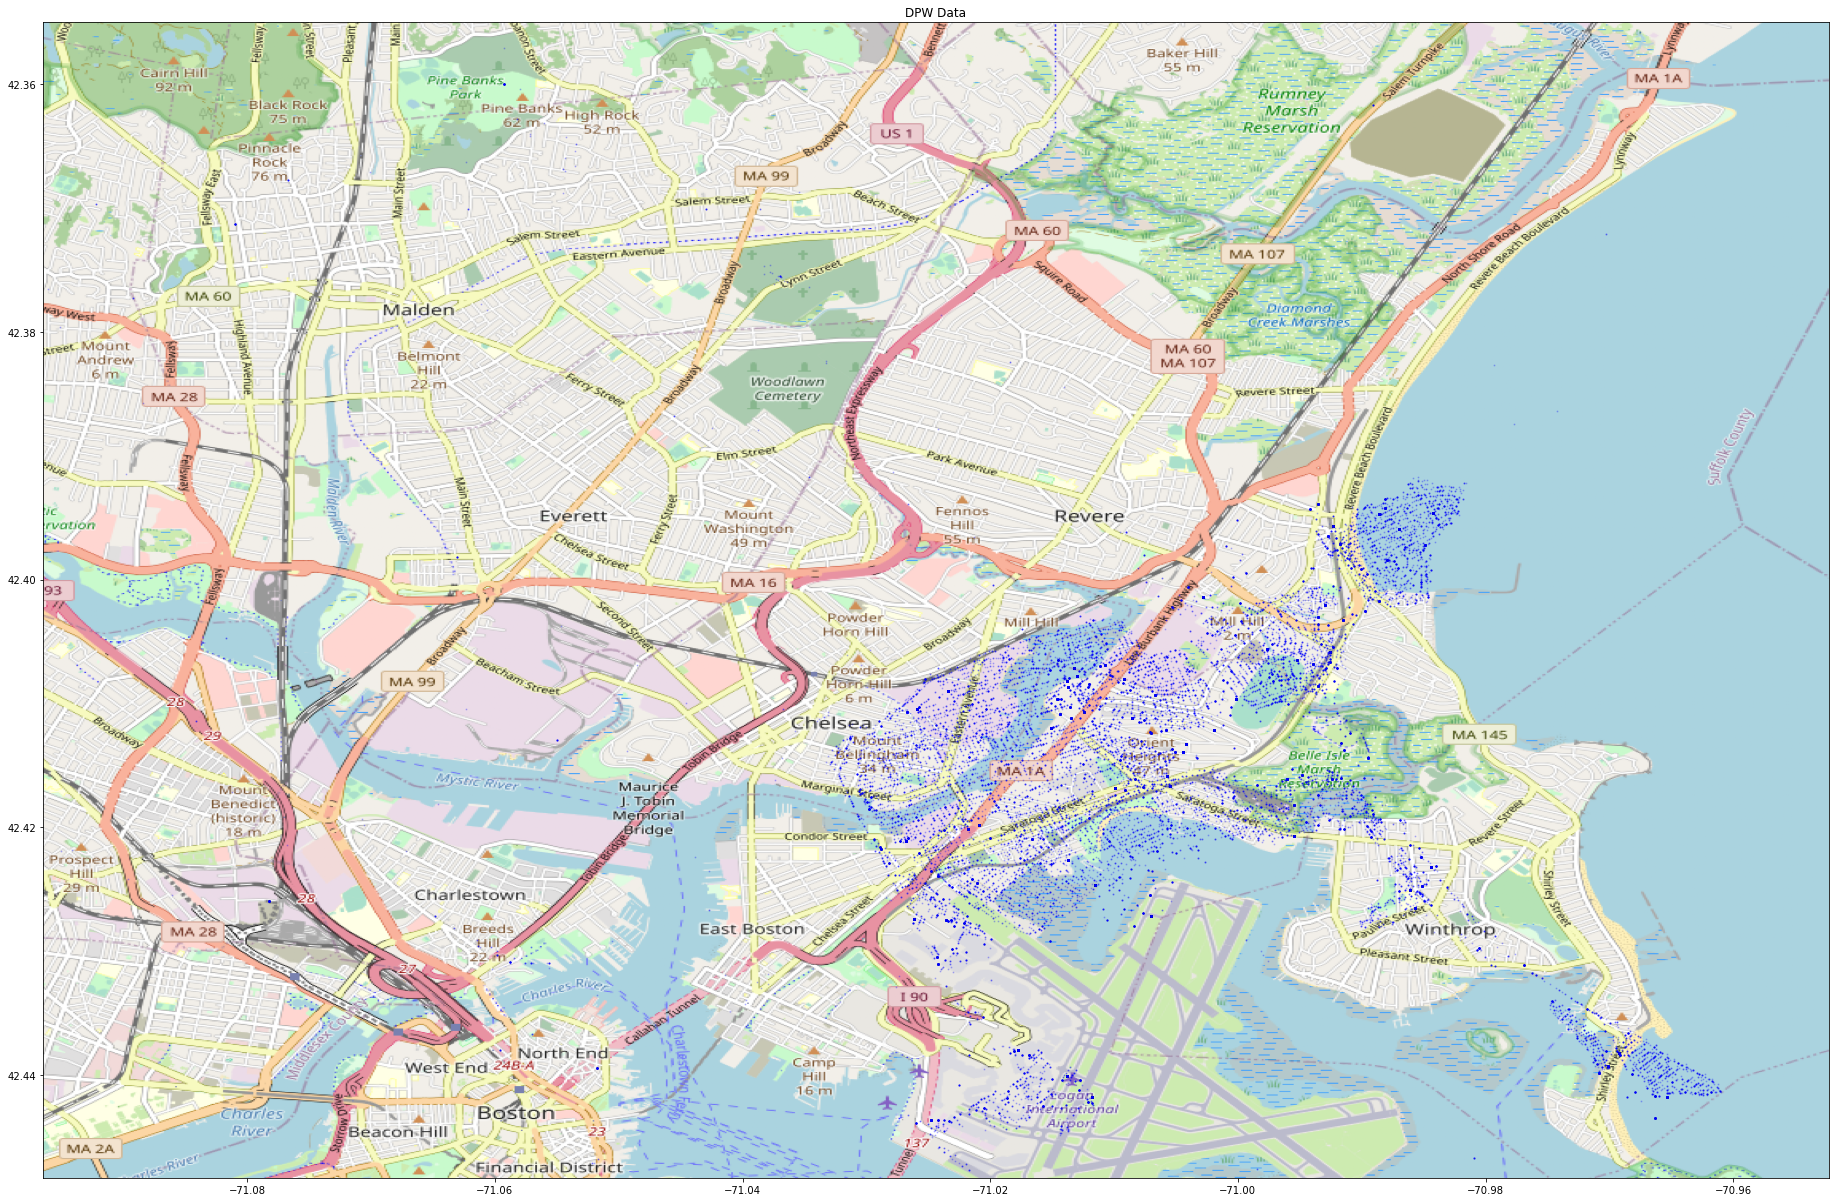

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (32,28))
ax.scatter(df2.Longs, df2.Lats, zorder=1, alpha= 0.2, c='b', s=1)
ax.set_title('DPW Data')
mapimg = plt.imread('../input/photos/map(3).png')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapimg, zorder=0, extent = BBox, aspect= 'equal')

In [30]:
# import geopandas as gpd
# from shapely.geometry import Point, Polygon
# import matplotlib.pyplot as plt
# import folium
# m = folium.Map(location=[42.427141, -71.007056],zoom_start=10)
# folium.LatLngPopup().add_to(m)
# def addPoints(latLong, workType):
#     tupe = eval(latLong)
#     folium.Marker(
#         [tupe[0], tupe[1]], popup=workType
#     ).add_to(m)    
#     return None
# df2.apply(lambda x: addPoints(x['LatLong'], x['Work Type']), axis=1)

# m

In [31]:
# m.save('lemap.html')

So what is in our columns?

In [16]:
print(df['Status'].unique())
print(df['Priority'].unique())
print(df['Work Type'].unique())

['Complete' 'Closed-No Action Taken'
 'Pending (Awaiting Funding or More Info)' 'Reopened' 'New Request'
 'In Progress/Inspected/Reassigned']
[ 5  2  3  1  7  8  9  4  6 10  0]
['ALL-Street Cleaning' 'Cptry-Barrel Stands •' 'Cptry-Board Up •'
 'Cptry-Building Repairs •' 'Cptry-City Fence Repair •' 'Cptry-General •'
 'Cptry-Public Stairs •' 'Cptry-Railings •' 'Cust-Amer Legion Clean'
 'Cust-Bathroom Resupply' 'Cust-Bldg Maintenance' 'Cust-Boiler/Heat check'
 'Cust-Chambers Check' 'Cust-Clean Bathroom' 'Cust-Clean Ditch'
 'Cust-Clean Elevator' "Cust-Clean Mayor's Ofc" 'Cust-Cleaning'
 'Cust-Equipment Maintenance' 'Cust-Events •'
 'Cust-Furniture Move/Removal •' 'Cust-Inmates/Roca •' 'Cust-Mail Duty'
 'Cust-Mowing •' 'Cust-Newspapers' 'Cust-Office Recycling'
 'Cust-Office Trash' 'Cust-Open/Close City Hall' 'Cust-Resupply Offices'
 'Cust-Soap Dispensers' 'Cust-Wash Floor' 'DR-Catch Basin Clean •'
 'DR-Catch Basin Inspect •' 'DR-Catch Basin Rebuild •'
 'DR-Clvrt & Trash Rack Clean •' 'DR-Cl

...I should split these into two columns???